In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals import joblib 
#import ggplot

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


#### There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [2]:
data = pd.read_csv("UCI_Credit_Card.csv")

In [3]:
data = data.rename(columns={'default.payment.next.month': 'default_pay', 'PAY_0': 'PAY_1'})

In [4]:
data.head()
# default_pay (1=yes, 0=No)
# gender (1=male, 2=female)
# MARRIAGE (1=married, 2=single, 3=others)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID             30000 non-null int64
LIMIT_BAL      30000 non-null float64
SEX            30000 non-null int64
EDUCATION      30000 non-null int64
MARRIAGE       30000 non-null int64
AGE            30000 non-null int64
PAY_1          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
PAY_4          30000 non-null int64
PAY_5          30000 non-null int64
PAY_6          30000 non-null int64
BILL_AMT1      30000 non-null float64
BILL_AMT2      30000 non-null float64
BILL_AMT3      30000 non-null float64
BILL_AMT4      30000 non-null float64
BILL_AMT5      30000 non-null float64
BILL_AMT6      30000 non-null float64
PAY_AMT1       30000 non-null float64
PAY_AMT2       30000 non-null float64
PAY_AMT3       30000 non-null float64
PAY_AMT4       30000 non-null float64
PAY_AMT5       30000 non-null float64
PAY_AMT6       30000 non-null float64
d

In [69]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_pay'],
      dtype='object')

In [88]:
lis = [ 'LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [7]:
data.isnull().sum()

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_1          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
default_pay    0
dtype: int64

In [6]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


EDUCATION has category 5, 6 and 0 that are unlabelled.
MARRIAGE has a label 0 that is undocumented

In [5]:
data['EDUCATION'].replace(0, 4,inplace=True)
data['EDUCATION'].replace(5, 4,inplace=True)
data['EDUCATION'].replace(6, 4,inplace=True)

In [6]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

for payment we are now using (0=pay duly, 1 = delay for one month, 2 = delay for two months etc.)

In [7]:
data['PAY_1'].replace(-1, 0,inplace=True)
data['PAY_1'].replace(-2, 0,inplace=True)

In [8]:
data['PAY_2'].replace(-1, 0,inplace=True)
data['PAY_2'].replace(-2, 0,inplace=True)

In [9]:
data['PAY_3'].replace(-1, 0,inplace=True)
data['PAY_3'].replace(-2, 0,inplace=True)

In [10]:
data['PAY_4'].replace(-1, 0,inplace=True)
data['PAY_4'].replace(-2, 0,inplace=True)

In [11]:
data['PAY_5'].replace(-1, 0,inplace=True)
data['PAY_5'].replace(-2, 0,inplace=True)

In [12]:
data['PAY_6'].replace(-1, 0,inplace=True)
data['PAY_6'].replace(-2, 0,inplace=True)

In [16]:
data.PAY_4.value_counts()

0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
8        2
1        2
Name: PAY_4, dtype: int64

In [13]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [14]:
# changing '0' to '3' for marriage (1=married, 2=single, 3=others)
data['MARRIAGE'].replace(0, 3, inplace=True)

In [15]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1049a5ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x115b6d050>,
 'boxes': [<matplotlib.lines.Line2D at 0x1049a5e90>],
 'medians': [<matplotlib.lines.Line2D at 0x1049ca9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1049bba90>],
 'means': []}

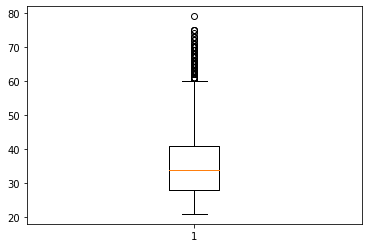

In [17]:
plt.boxplot(data['AGE'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID             30000 non-null int64
LIMIT_BAL      30000 non-null float64
SEX            30000 non-null int64
EDUCATION      30000 non-null int64
MARRIAGE       30000 non-null int64
AGE            30000 non-null int64
PAY_1          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
PAY_4          30000 non-null int64
PAY_5          30000 non-null int64
PAY_6          30000 non-null int64
BILL_AMT1      30000 non-null float64
BILL_AMT2      30000 non-null float64
BILL_AMT3      30000 non-null float64
BILL_AMT4      30000 non-null float64
BILL_AMT5      30000 non-null float64
BILL_AMT6      30000 non-null float64
PAY_AMT1       30000 non-null float64
PAY_AMT2       30000 non-null float64
PAY_AMT3       30000 non-null float64
PAY_AMT4       30000 non-null float64
PAY_AMT5       30000 non-null float64
PAY_AMT6       30000 non-null float64
d

In [16]:
def correlation(Col1, Col2):
    res = data.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [22]:
correlation('EDUCATION', 'default_pay')

default_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


In [23]:
data.groupby(['SEX', 'default_pay']).size()

SEX  default_pay
1    0               9015
     1               2873
2    0              14349
     1               3763
dtype: int64

In [24]:
correlation('EDUCATION', 'default_pay')

default_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


In [25]:
data.PAY_1.value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

In [17]:
data.BILL_AMT1.max()

964511.0

In [18]:
(data['BILL_AMT4']<0).sum()

675

In [19]:
data['BILL_AMT1'].min()

-165580.0

In [20]:
(data['BILL_AMT1']<0).sum()

590

In [27]:
# # save data as pikel file 
# joblib.dump(data, 'creditcard_cleandata.pkl') 

['creditcard_cleandata.pkl']

In [3]:
# Load the half clean data from the file 
data2 = joblib.load('creditcard_cleandata.pkl') 

In [4]:
(data['BILL_AMT1'] > 0).sum()

27402

In [5]:
data['BILL_AMT1'].isnull().sum()

0

In [6]:
(data['BILL_AMT1'] == 0).sum()

2008

In [7]:
data['BILL_AMT1'].shape

(30000,)

In [8]:
data.iloc[:,17].isnull().sum()

0

### replace all negative values with nan in dataset 

In [22]:
data.loc[(data['BILL_AMT1'] < 0), 'BILL_AMT1']=np.nan
data.loc[(data['BILL_AMT2'] < 0), 'BILL_AMT2']=np.nan
data.loc[(data['BILL_AMT3'] < 0), 'BILL_AMT3']=np.nan
data.loc[(data['BILL_AMT4'] < 0), 'BILL_AMT4']=np.nan
data.loc[(data['BILL_AMT5'] < 0), 'BILL_AMT5']=np.nan
data.loc[(data['BILL_AMT6'] < 0), 'BILL_AMT6']=np.nan

In [16]:
data.columns.get_loc("BILL_AMT6")

17

In [23]:
data.iloc[:,12:18 ].isnull().sum()

BILL_AMT1    590
BILL_AMT2    669
BILL_AMT3    655
BILL_AMT4    675
BILL_AMT5    655
BILL_AMT6    688
dtype: int64

In [150]:
from IPython.display import display
pd.options.display.max_columns = None
display(data.tail(10))

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
29990,29991,140000.0,1,2,1,41,0,0,0,0,0,0,138325.0,137142.0,139110.0,138262.0,49675.0,46121.0,6000.0,7000.0,4228.0,1505.0,2000.0,2000.0,0
29991,29992,210000.0,1,2,1,34,3,2,2,2,2,2,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29992,29993,10000.0,1,3,1,43,0,0,0,0,0,0,8802.0,10400.0,0.0,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0
29993,29994,100000.0,1,1,2,38,0,0,0,0,0,0,3042.0,1427.0,102996.0,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0
29994,29995,80000.0,1,2,2,34,2,2,2,2,2,2,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,0,0,0,0,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,0,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,0,0,0,0,0,NaN,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [149]:
from IPython.display import display
pd.options.display.max_columns = None
display(data_2.sample(10))

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
3769,3770,290000.0,2,4,2,38,1,0,0,0,0,0,0.0,1437.0,3070.0,1406.0,2196.0,1481.0,1437.0,3078.0,1406.0,2196.0,1481.0,0.0,0
15102,15103,50000.0,1,1,2,40,1,2,0,0,0,0,25667.0,26441.0,27213.0,28521.0,28458.0,29053.0,1500.0,1500.0,1771.0,1500.0,1053.0,1093.0,0
15791,15792,70000.0,2,1,2,26,0,0,0,0,0,0,41614.0,43610.0,46581.0,47634.0,51305.0,52580.0,3000.0,4000.0,1829.0,4500.0,2100.0,2500.0,0
27881,27882,250000.0,2,1,1,27,0,0,0,0,0,0,85238.0,87797.0,75436.0,58695.0,41211.0,34987.0,20004.0,2893.0,2201.0,1215.0,10040.0,10041.0,0
29793,29794,50000.0,1,2,2,43,0,0,0,0,0,0,12661.0,13743.0,14777.0,12404.0,10777.0,16597.0,1600.0,1605.0,2000.0,500.0,6000.0,6000.0,1
16585,16586,470000.0,1,1,2,27,0,0,0,0,0,0,213495.0,183680.0,153743.0,146971.0,127546.0,129998.0,10005.0,9001.0,8001.0,5001.0,5001.0,6145.0,0
20777,20778,410000.0,1,1,2,32,0,0,0,0,0,0,3339.0,13047.0,7764.0,623.0,4695.0,4133.0,10000.0,7764.0,623.0,4695.0,5973.0,4421.0,0
13575,13576,40000.0,2,2,2,26,2,2,2,2,2,2,5678.0,9900.0,9592.0,10433.0,10521.0,10203.0,4500.0,0.0,1000.0,400.0,0.0,2200.0,1
14269,14270,300000.0,1,1,1,38,0,0,0,0,0,0,87118.0,56182.0,60039.0,52009.0,32862.0,3730.0,1691.0,10043.0,1065.0,164.0,3748.0,1132.0,0
13,14,70000.0,1,2,2,30,1,2,2,0,0,2,65802.0,67369.0,65701.0,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1


### Replacing the nan values using imputation method
There are clients that paid more then they were asked to, had even a negative bill in Sept., and still have a month of delay, and even defaulted the next month, so i am going to convert all the negative values into nan's and will replace them with mean.

In [24]:
data['BILL_AMT1'].loc[5]

64400.0

In [19]:
data['BILL_AMT1'].loc[5] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


now we will fill the 5th location with mean/median and use the method which gives the closest result.

In [24]:
data['BILL_AMT1'].mean()

52273.68686456582

In [21]:
data['BILL_AMT1'].median()

23790.0

As mean is closer to actual result so using the mean to fill the nan values.

In [26]:
data['BILL_AMT1'] = data['BILL_AMT1'].fillna(data['BILL_AMT1'].mean())
data['BILL_AMT2'] = data['BILL_AMT2'].fillna(data['BILL_AMT2'].mean())
data['BILL_AMT3'] = data['BILL_AMT3'].fillna(data['BILL_AMT3'].mean())
data['BILL_AMT4'] = data['BILL_AMT4'].fillna(data['BILL_AMT4'].mean())
data['BILL_AMT5'] = data['BILL_AMT5'].fillna(data['BILL_AMT5'].mean())
data['BILL_AMT6'] = data['BILL_AMT6'].fillna(data['BILL_AMT6'].mean())

In [27]:
data.iloc[:,12:18 ].isnull().sum()

BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
dtype: int64

In [28]:
#data.columns.get_loc('BILL_AMT1')

### Replacing the missing values with KNN imputation

In [29]:
#from tqdm import tqdm

In [30]:
# #using for loop to replace the negative values with nan
# for i in tqdm(range (12, 18)):
#     data2.iloc[:,i] = data2.iloc[:,i].replace((data2.iloc[:,i] < 0), np.nan)

In [4]:
data2.loc[(data2['BILL_AMT1'] < 0), 'BILL_AMT1']=np.nan
data2.loc[(data2['BILL_AMT2'] < 0), 'BILL_AMT2']=np.nan
data2.loc[(data2['BILL_AMT3'] < 0), 'BILL_AMT3']=np.nan
data2.loc[(data2['BILL_AMT4'] < 0), 'BILL_AMT4']=np.nan
data2.loc[(data2['BILL_AMT5'] < 0), 'BILL_AMT5']=np.nan
data2.loc[(data2['BILL_AMT6'] < 0), 'BILL_AMT6']=np.nan

In [5]:
data2.iloc[:,12:18].isna().sum()

BILL_AMT1    590
BILL_AMT2    669
BILL_AMT3    655
BILL_AMT4    675
BILL_AMT5    655
BILL_AMT6    688
dtype: int64

In [33]:
data2.columns[18]

'PAY_AMT1'

Replacing the missing values with KNN imputation

In [6]:
from sklearn.impute import KNNImputer

In [7]:
imputer = KNNImputer(n_neighbors=2)
data2['BILL_AMT1']= imputer.fit_transform(data2[['BILL_AMT1']])
data2['BILL_AMT2']= imputer.fit_transform(data2[['BILL_AMT2']])
data2['BILL_AMT3']= imputer.fit_transform(data2[['BILL_AMT3']])
data2['BILL_AMT4']= imputer.fit_transform(data2[['BILL_AMT4']])
data2['BILL_AMT5']= imputer.fit_transform(data2[['BILL_AMT5']])
data2['BILL_AMT6']= imputer.fit_transform(data2[['BILL_AMT6']])

In [60]:
data2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,0,0,0,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [8]:
data2.iloc[:,12:18].isna().sum()

BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
dtype: int64

In [36]:
data2['BILL_AMT1'].isna().value_counts()

False    30000
Name: BILL_AMT1, dtype: int64

In [81]:
# # save data as pikel file 
# joblib.dump(data2, 'creditcard_cleandataknn.pkl') 

['creditcard_cleandataknn.pkl']

In [353]:
# Load the 3rd half clean data from the file 
data2 = joblib.load('creditcard_cleandataknn.pkl') 

### Outlier Analysis

In [155]:
for i in lis:
    data2.loc[:,i] = data2.loc[:,i].astype('object')

CPU times: user 60.6 ms, sys: 20.2 ms, total: 80.8 ms
Wall time: 81.8 ms


{'whiskers': [<matplotlib.lines.Line2D at 0x1a25ba7850>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2a190510>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a25ba74d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25d2ed90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2ad1bcd0>],
 'means': []}

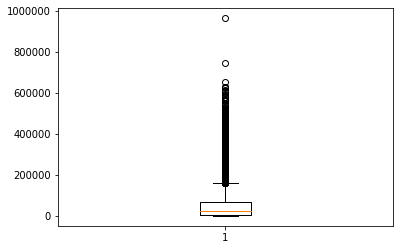

In [156]:
%%time
%matplotlib inline 
plt.boxplot(data3['BILL_AMT1'])

CPU times: user 58.7 ms, sys: 4.3 ms, total: 63 ms
Wall time: 64.4 ms


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1f845110>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1ecf1cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x118816650>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1f845810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1dbc4850>],
 'means': []}

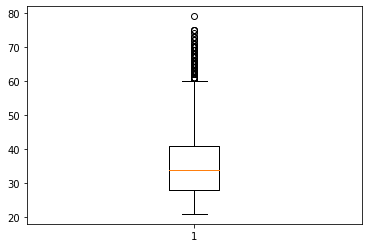

In [15]:
%%time
%matplotlib inline 
plt.boxplot(data2['AGE'])

### Replacing the outliers with nan

In [203]:
# dataset = []
# for i in lis:
#     Q1 = data2[i].quantile(0.25)
#     Q3 = data2[i].quantile(0.75)
#     IQR = Q3 - Q1
#     min = Q1 - (IQR*1.5)
#     max = Q3 + (IQR*1.5)
#     data2.loc[data2[i]<min1, ] =np.nan
#     data2.loc[data2['LIMIT_BAL']>max1, 'LIMIT_BAL'] =np.nan
# #     fil = ((data2[i] < min) & (data2[i] > max))
# #     dataset.append(fil)
# #     #data2[i][fil] = np.nan

In [ ]:
for i in lis 

In [360]:
values = []
for i in lis:
    Q1 = data2[i].quantile(0.25)
    Q3 = data2[i].quantile(0.75)
    IQR = Q3 - Q1
    min1 = Q1 - (IQR*1.5)
    max1 = Q3 + (IQR*1.5)
    values.append((min1, max1))
    print(i) 
    print(((data2[i] < (Q1 - 1.5 * IQR)) | (data2[i] > (Q3 + 1.5 * IQR))).sum())

LIMIT_BAL
167
AGE
272
BILL_AMT1
2430
BILL_AMT2
2426
BILL_AMT3
2504
BILL_AMT4
2670
BILL_AMT5
2766
BILL_AMT6
2727
PAY_AMT1
2745
PAY_AMT2
2714
PAY_AMT3
2598
PAY_AMT4
2994
PAY_AMT5
2945
PAY_AMT6
2958


In [365]:
values

[(-235000.0, 525000.0),
 (8.5, 60.5),
 (-89447.75, 161014.25),
 (-86009.375, 154015.625),
 (-81154.0, 144956.0),
 (-73944.0, 131576.0),
 (-69196.375, 121822.625),
 (-69219.875, 120249.125),
 (-5009.0, 11015.0),
 (-5417.5, 11250.5),
 (-5782.5, 10677.5),
 (-5279.875, 9589.125),
 (-5416.0, 9700.0),
 (-5705.625, 9823.375)]

In [366]:
dfObj = pd.DataFrame(values) 

In [389]:
outlier_list = pd.DataFrame(values, columns = ['min1' , 'max1']) 

In [395]:
outlier_list.dtypes

min1    float64
max1    float64
dtype: object

In [405]:
outlier_list.iloc[:]

,min1,max1
0,-235000.000,525000.000
1,8.500,60.500
2,-89447.750,161014.250
3,-86009.375,154015.625
4,-81154.000,144956.000
5,-73944.000,131576.000
6,-69196.375,121822.625
7,-69219.875,120249.125
8,-5009.000,11015.000
9,-5417.500,11250.500


In [357]:
Q1 = data2['LIMIT_BAL'].quantile(0.25)
Q3 = data2['LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['LIMIT_BAL'] < min1,'LIMIT_BAL'] = np.nan

# data2.replace(to_replace = data2['LIMIT_BAL']<min1, value = np.nan) 
# data2.replace(to_replace = data2['LIMIT_BAL']>max1, value = np.nan) 

In [384]:
data2.count()

ID             30000
LIMIT_BAL      30000
SEX            30000
EDUCATION      30000
MARRIAGE       30000
AGE            30000
PAY_1          30000
PAY_2          30000
PAY_3          30000
PAY_4          30000
PAY_5          30000
PAY_6          30000
BILL_AMT1      30000
BILL_AMT2      30000
BILL_AMT3      30000
BILL_AMT4      30000
BILL_AMT5      30000
BILL_AMT6      30000
PAY_AMT1       30000
PAY_AMT2       30000
PAY_AMT3       30000
PAY_AMT4       30000
PAY_AMT5       30000
PAY_AMT6       30000
default_pay    30000
dtype: int64

In [351]:
Q1 = data2['LIMIT_BAL'].quantile(0.25)
Q3 = data2['LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['LIMIT_BAL']<min1, 'LIMIT_BAL'] =np.nan
data2.loc[data2['LIMIT_BAL']>max1, 'LIMIT_BAL'] =np.nan

In [316]:
Q1 = data2['AGE'].quantile(0.25)
Q3 = data2['AGE'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['AGE']<min1, 'AGE'] =np.nan
data2.loc[data2['AGE']>max1, 'AGE'] =np.nan

In [317]:
Q1 = data2['BILL_AMT1'].quantile(0.25)
Q3 = data2['BILL_AMT1'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['BILL_AMT1']<min1, 'BILL_AMT1'] =np.nan
data2.loc[data2['BILL_AMT1']>max1, 'BILL_AMT1'] =np.nan

In [318]:
Q1 = data2['BILL_AMT2'].quantile(0.25)
Q3 = data2['BILL_AMT2'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['BILL_AMT2']<min1, 'BILL_AMT2'] =np.nan
data2.loc[data2['BILL_AMT2']>max1, 'BILL_AMT2'] =np.nan

In [319]:
Q1 = data2['BILL_AMT3'].quantile(0.25)
Q3 = data2['BILL_AMT3'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['BILL_AMT3']<min1, 'BILL_AMT3'] =np.nan
data2.loc[data2['BILL_AMT3']>max1, 'BILL_AMT3'] =np.nan

In [320]:
Q1 = data2['BILL_AMT4'].quantile(0.25)
Q3 = data2['BILL_AMT4'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['BILL_AMT4']<min1, 'BILL_AMT4'] =np.nan
data2.loc[data2['BILL_AMT4']>max1, 'BILL_AMT4'] =np.nan

In [321]:
Q1 = data2['BILL_AMT5'].quantile(0.25)
Q3 = data2['BILL_AMT5'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['BILL_AMT5']<min1, 'BILL_AMT5'] =np.nan
data2.loc[data2['BILL_AMT5']>max1, 'BILL_AMT5'] =np.nan

In [322]:
Q1 = data2['BILL_AMT6'].quantile(0.25)
Q3 = data2['BILL_AMT6'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['BILL_AMT6']<min1, 'BILL_AMT6'] =np.nan
data2.loc[data2['BILL_AMT6']>max1, 'BILL_AMT6'] =np.nan

In [323]:
Q1 = data2['PAY_AMT1'].quantile(0.25)
Q3 = data2['PAY_AMT1'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['PAY_AMT1']<min1, 'PAY_AMT1'] =np.nan
data2.loc[data2['PAY_AMT1']>max1, 'PAY_AMT1'] =np.nan

In [324]:
Q1 = data2['PAY_AMT2'].quantile(0.25)
Q3 = data2['PAY_AMT2'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['PAY_AMT2']<min1, 'PAY_AMT2'] =np.nan
data2.loc[data2['PAY_AMT2']>max1, 'PAY_AMT2'] =np.nan

In [325]:
Q1 = data2['PAY_AMT3'].quantile(0.25)
Q3 = data2['PAY_AMT3'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['PAY_AMT3']<min1, 'PAY_AMT3'] =np.nan
data2.loc[data2['PAY_AMT3']>max1, 'PAY_AMT3'] =np.nan

In [326]:
Q1 = data2['PAY_AMT4'].quantile(0.25)
Q3 = data2['PAY_AMT4'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['PAY_AMT4']<min1, 'PAY_AMT4'] =np.nan
data2.loc[data2['PAY_AMT4']>max1, 'PAY_AMT4'] =np.nan

In [327]:
Q1 = data2['PAY_AMT5'].quantile(0.25)
Q3 = data2['PAY_AMT5'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['PAY_AMT5']<min1, 'PAY_AMT5'] =np.nan
data2.loc[data2['PAY_AMT5']>max1, 'PAY_AMT5'] =np.nan

In [328]:
Q1 = data2['PAY_AMT6'].quantile(0.25)
Q3 = data2['PAY_AMT6'].quantile(0.75)
IQR = Q3 - Q1
min1 = Q1 - (IQR*1.5)
max1 = Q3 + (IQR*1.5)
data2.loc[data2['PAY_AMT6']<min1, 'PAY_AMT6'] =np.nan
data2.loc[data2['PAY_AMT6']>max1, 'PAY_AMT6'] =np.nan

In [356]:
data2[lis].isna().sum()

LIMIT_BAL    0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

we didn't replce the outliers with means directly as the outliers will affect the mean. Now replacing the null values with mean.

In [334]:
data2['LIMIT_BAL'] = data2['LIMIT_BAL'].fillna(data2['LIMIT_BAL'].mean())
data2['AGE'] = data2['AGE'].fillna(data2['AGE'].mean())
data2['BILL_AMT1'] = data2['BILL_AMT1'].fillna(data2['BILL_AMT1'].mean())
data2['BILL_AMT2'] = data2['BILL_AMT2'].fillna(data2['BILL_AMT2'].mean())
data2['BILL_AMT3'] = data2['BILL_AMT3'].fillna(data2['BILL_AMT3'].mean())
data2['BILL_AMT4'] = data2['BILL_AMT4'].fillna(data2['BILL_AMT4'].mean())
data2['BILL_AMT5'] = data2['BILL_AMT5'].fillna(data2['BILL_AMT5'].mean())
data2['BILL_AMT6'] = data2['BILL_AMT6'].fillna(data2['BILL_AMT6'].mean())
data2['PAY_AMT1'] = data2['PAY_AMT1'].fillna(data2['PAY_AMT1'].mean())
data2['PAY_AMT2'] = data2['PAY_AMT2'].fillna(data2['PAY_AMT2'].mean())
data2['PAY_AMT3'] = data2['PAY_AMT3'].fillna(data2['PAY_AMT3'].mean())
data2['PAY_AMT4'] = data2['PAY_AMT4'].fillna(data2['PAY_AMT4'].mean())
data2['PAY_AMT5'] = data2['PAY_AMT5'].fillna(data2['PAY_AMT5'].mean())
data2['PAY_AMT6'] = data2['PAY_AMT6'].fillna(data2['PAY_AMT6'].mean())

In [335]:
data2[lis].isna().sum()

LIMIT_BAL    0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64